<a href="https://colab.research.google.com/github/arjunkpreman/Transfer-Learning-Project/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [7]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # num_classes is the number of classes in your task

In [8]:

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

Found 3015 images belonging to 10 classes.


In [11]:
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 921 images belonging to 10 classes.


In [17]:
# Train the model
r=model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=10
)

<ipython-input-17-07f1f0826cdd>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/10
94/94 [==============================] - 28s 298ms/step - loss: 0.0668 - accuracy: 0.9883 - val_loss: 0.3760 - val_accuracy: 0.8672
Epoch 2/10
94/94 [==============================] - 27s 290ms/step - loss: 0.0559 - accuracy: 0.9926 - val_loss: 0.3708 - val_accuracy: 0.8661
Epoch 3/10
94/94 [==============================] - 28s 294ms/step - loss: 0.0577 - accuracy: 0.9886 - val_loss: 0.3785 - val_accuracy: 0.8862
Epoch 4/10
94/94 [==============================] - 23s 245ms/step - loss: 0.0521 - accuracy: 0.9920 - val_loss: 0.3527 - val_accuracy: 0.8850
Epoch 5/10
94/94 [==============================] - 23s 240ms/step - loss: 0.0424 - accuracy: 0.9956 - val_loss: 0.3585 - val_accuracy: 0.8873
Epoch 6/10
94/94 [==============================] - 28s 298ms/step - loss: 0.0330 - accuracy: 0.9973 - val_loss: 0.4125 - val_accuracy: 0.8705
Epoch 7/10
94/94 [==============================] - 28s 297ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.3465 - val_accuracy: 0.8917

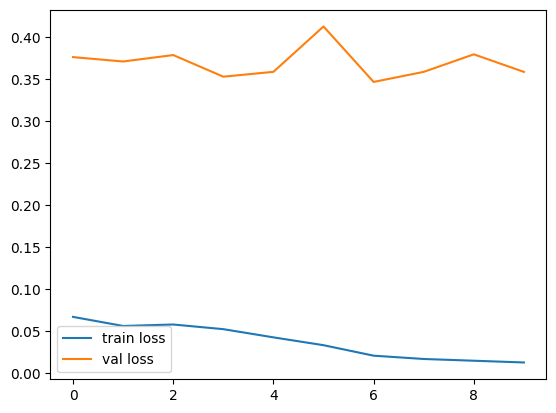

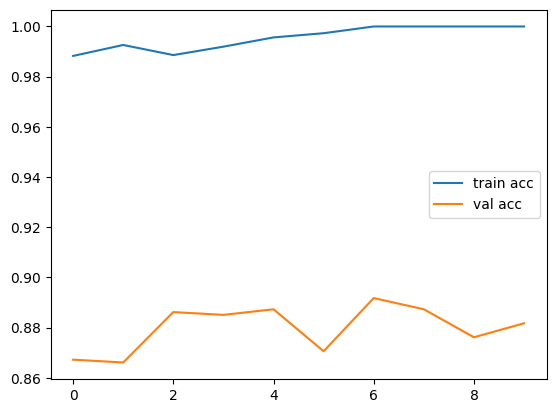

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# Save the trained model
model.save('/content/drive/MyDrive/Dataset/InceptionV3.h5')

In [20]:
model.evaluate(val_generator)

29/29 [==============================] - 5s 169ms/step - loss: 0.3524 - accuracy: 0.8838


[0.3524152636528015, 0.8838219046592712]